In [48]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [49]:
data =  pd.read_csv("Book2.csv")
data

,Unnamed: 0,videos,days,subscribers,views
0,channel 1,30,150,1800,34000
1,channel 2,40,212,1950,41000
2,channel 3,50,179,2100,42500
3,channel 4,60,346,4300,54300
4,channel 5,70,280,4200,56000


In [50]:
model = LinearRegression()
model.fit(data[['videos','days','subscribers']],data.views)

LinearRegression()

In [51]:
model.predict([[45,180,3100]])

/home/shevi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41483.5043287])

In [52]:
model.coef_

array([3.81732131e+02, 4.21209097e+01, 3.54006782e-01])

In [53]:
model.intercept_

15626.373669488323

In [54]:
new_y = model.coef_[0]*45+model.coef_[1]*180 + model.coef_[2]*3100 +model.intercept_
new_y

41483.504328703

In [61]:
x = np.array([data.videos])
y = np.array([data.days])
z = np.array([data.views])
x,y,z

(array([[30, 40, 50, 60, 70]]),
 array([[150, 212, 179, 346, 280]]),
 array([[34000, 41000, 42500, 54300, 56000]]),
 0    30
 1    40
 2    50
 3    60
 4    70
 Name: videos, dtype: int64)

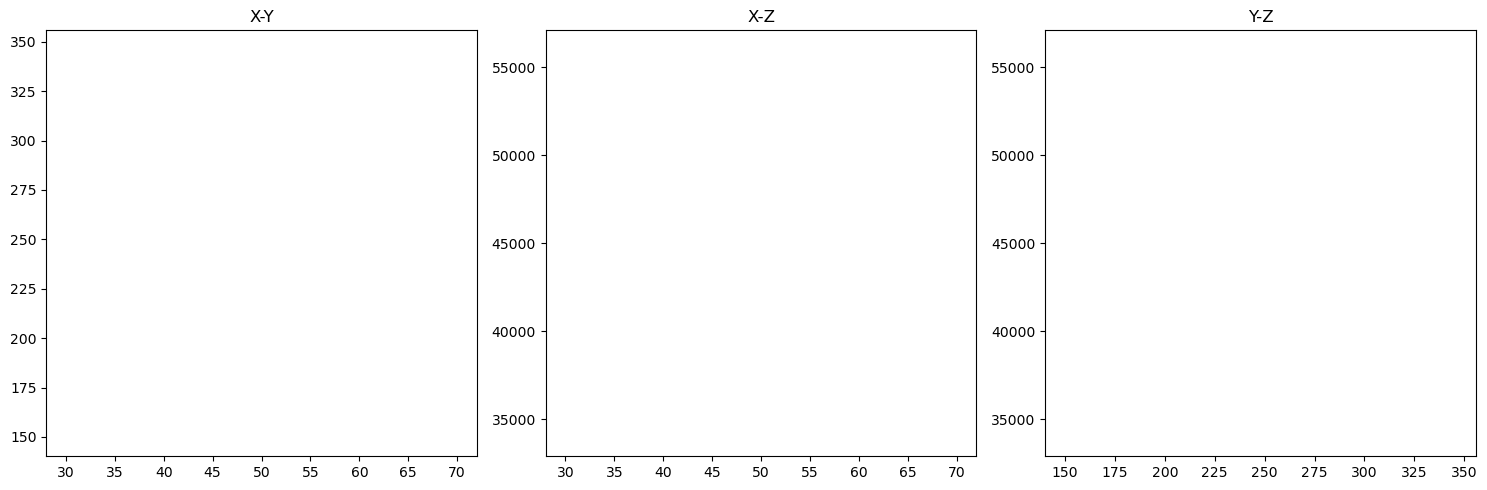

In [56]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot x-y
axs[0].plot(x, y, 'r-')
axs[0].set_title('X-Y')

# Plot x-z
axs[1].plot(x, z, 'g-')
axs[1].set_title('X-Z')

# Plot y-z
axs[2].plot(y, z, 'b-')
axs[2].set_title('Y-Z')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


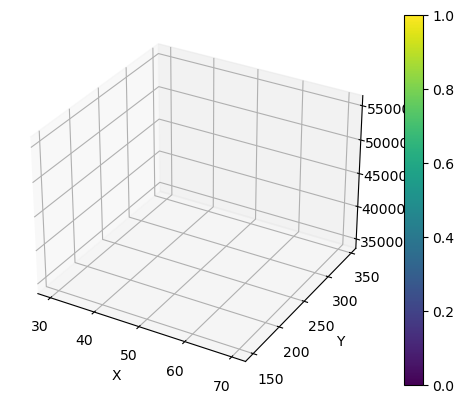

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='viridis')

# Customize the axes labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a color bar which maps values to colors
fig.colorbar(surf)

# Show the plot
plt.show()


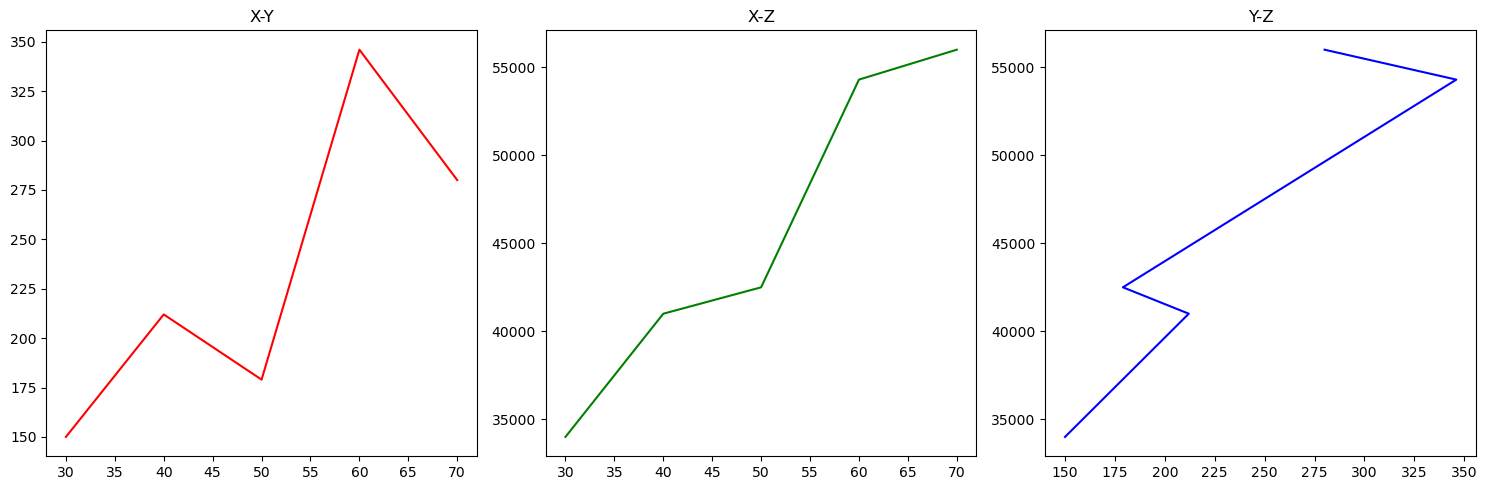

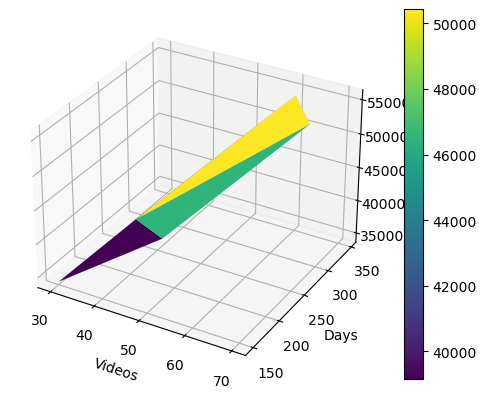

In [60]:
from mpl_toolkits.mplot3d import Axes3D

# Sample data
x = np.array([30, 40, 50, 60, 70])
y = np.array([150, 212, 179, 346, 280])
z = np.array([34000, 41000, 42500, 54300, 56000])

# Create a figure and subplots for 2D plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot x-y
axs[0].plot(x, y, 'r-')
axs[0].set_title('X-Y')

# Plot x-z
axs[1].plot(x, z, 'g-')
axs[1].set_title('X-Z')

# Plot y-z
axs[2].plot(y, z, 'b-')
axs[2].set_title('Y-Z')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the 2D plots
plt.show()

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_trisurf(x, y, z, cmap='viridis')

# Customize the axes labels
ax.set_xlabel('Videos')
ax.set_ylabel('Days')
ax.set_zlabel('Views')

# Add a color bar which maps values to colors
fig.colorbar(surf)

# Show the 3D plot
plt.show()


ValueError: x and y must be equal-length 1D arrays

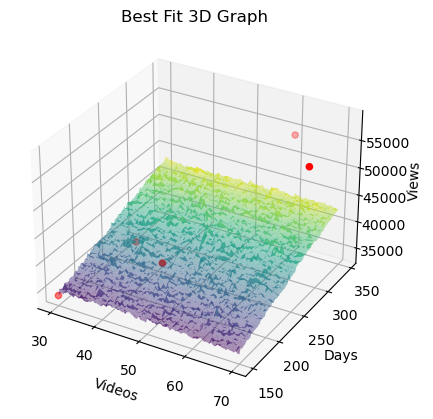

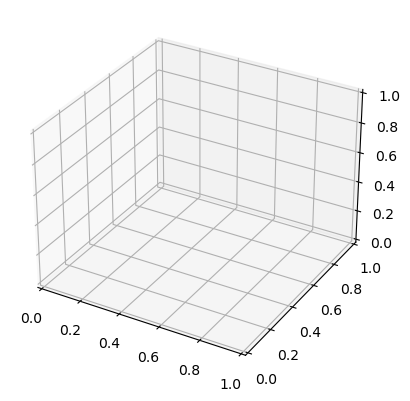

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Sample data
videos = np.array([30, 40, 50, 60, 70])
days = np.array([150, 212, 179, 346, 280])
subscribers = np.array([5000, 6000, 7000, 8000, 9000])
views = np.array([34000, 41000, 42500, 54300, 56000])

# Create a linear regression model
model = LinearRegression()
X = np.column_stack((videos, days, subscribers))
model.fit(X, views)

# Generate a meshgrid for videos, days, and subscribers
videos_range = np.linspace(min(videos), max(videos), 100)
days_range = np.linspace(min(days), max(days), 100)
subscribers_range = np.linspace(min(subscribers), max(subscribers), 100)
videos_mesh, days_mesh, subscribers_mesh = np.meshgrid(videos_range, days_range, subscribers_range)

# Predict views for each point in the meshgrid
predicted_views = model.predict(np.column_stack((videos_mesh.ravel(), days_mesh.ravel(), subscribers_mesh.ravel())))
predicted_views = predicted_views.reshape(videos_mesh.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Flatten meshgrid arrays
videos_mesh_flat = videos_mesh.flatten()
days_mesh_flat = days_mesh.flatten()
subscribers_mesh_flat = subscribers_mesh.flatten()
predicted_views_flat = predicted_views.flatten()

# Plot the surface
surf = ax.plot_trisurf(videos_mesh_flat, days_mesh_flat, predicted_views_flat, cmap='viridis', alpha=0.5)

# Plot the actual data as scatter points
ax.scatter(videos, days, views, color='r', label='Actual Data')

# Set labels and title
ax.set_xlabel('Videos')
ax.set_ylabel('Days')
ax.set_zlabel('Views')
ax.set_title('Best Fit 3D Graph')



# Add a color bar
fig.colorbar(surf)

# Add a legend
ax.legend()

# Show plot
plt.show()
